In [ ]:
#import libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


In [ ]:
data=pd.read_csv("/content/spam.csv",encoding="latin-1")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data=data.rename(columns={"v1":"label","v2":"message"})
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.isnull().sum()

label      0
message    0
dtype: int64

EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
len(data[data["label"]=="ham"]) #checking for sum of ham and spam
len(data[data["label"]=="spam"])

747

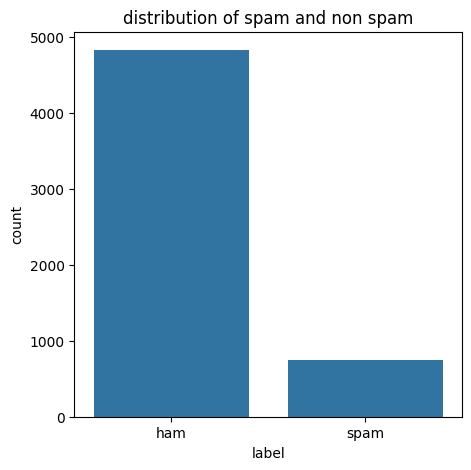

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x="label",data=data)
plt.title("distribution of spam and non spam")
plt.show()

In [ ]:
data["sms_len"]=data["message"].apply(len)

In [ ]:
data.head()

,label,message,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


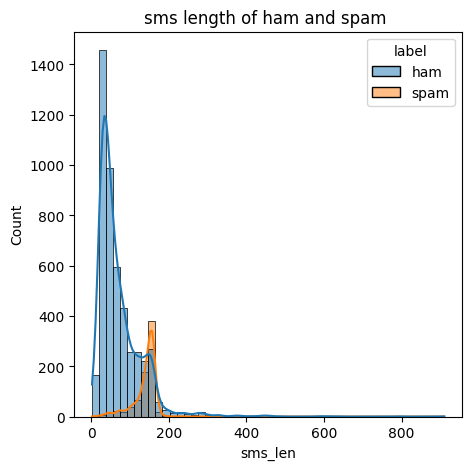

In [ ]:
#which is having more characters
plt.figure(figsize=(5,5))
sns.histplot(x="sms_len",data=data,hue="label",bins=50,kde=True)
plt.title("sms length of ham and spam ")
plt.show()


Text Preprocessing


In [ ]:
import re
def remove_html_tags(text):
    clean_text = re.sub(r"<[^>]*>", "", text)
    return clean_text
data["message"]=data["message"].apply(remove_html_tags)


In [ ]:
data.head()

,label,message,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['message'] = data['message']
def tokenize_text(text):
    tokens=word_tokenize(text)
    return tokens

data["message"]=data["message"].apply(tokenize_text)

In [ ]:
data["message"][0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [ ]:
#removing special char
def remove_special_characters(tokens):
  clean_tokens=[word for word in tokens if word.isalnum()]
  return clean_tokens
data["message"]=data["message"].apply(remove_special_characters)


In [ ]:
data["message"][0]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removing stopwords
stopwords=set(stopwords.words("english"))

In [ ]:
print(stopwords)

{"mustn't", 'between', 'did', "shouldn't", 'with', 'aren', 'do', 'her', 'hers', 'yourselves', 'them', 'am', 'you', 'own', 'than', 'ma', 'wasn', 'in', "hasn't", 'they', 'was', 'i', 'theirs', 'during', 'up', 'itself', 'will', 'shouldn', 'down', 'doesn', 't', 'this', 'of', 'couldn', 'same', 'about', 'won', "that'll", 'until', 'against', 'herself', 'hadn', 've', 'him', 'isn', 'only', 'few', 'nor', 'doing', 'through', "you've", 'into', 'after', 'above', "doesn't", 'very', 'on', 'ourselves', 'his', "hadn't", 'here', 'their', 'ain', 'now', 'does', 'all', 'before', 'mustn', 'shan', 'has', "shan't", 'by', 'while', 'no', 'an', 're', 'being', 'or', "mightn't", "you'd", "wouldn't", 'for', 'had', "won't", 'to', 'is', "couldn't", "it's", 'y', 'it', "isn't", 'me', 'too', 'those', 'been', 'the', 's', 'm', 'hasn', 'be', 'wouldn', 'who', "didn't", 'our', 'each', 'having', 'from', 'its', 'so', 'out', 'don', 'ours', 'whom', 'any', 'most', 'd', 'haven', 'these', 'as', 'under', 'o', 'are', 'can', 'then', 'w

In [ ]:
def remove_stopwords(tokens):
  filtered_words=[word for word in tokens if word not in stopwords]
  return filtered_words
data["message"]=data["message"].apply(remove_stopwords)

In [ ]:
data["message"][0]

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [ ]:
st=PorterStemmer()
def stem_words(tokens):
  stem_words=[st.stem(word) for word in tokens]
  return stem_words
data["message"]=data["message"].apply(stem_words)
data.head()

,label,message,sms_len
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,ham,"[ok, lar, joke, wif, u, oni]",29
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",49
4,ham,"[nah, i, think, goe, usf, live, around, though]",61


In [ ]:
data["message"]=data["message"].apply(lambda x:' '.join(map(str,x)).lower())
data["message"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    thi 2nd time tri 2 contact u pound prize 2 cla...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: message, Length: 5572, dtype: object

In [ ]:
data.head()

,label,message,sms_len
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah i think goe usf live around though,61


In [ ]:
data["message"][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
x=data["message"]
y=data["label"]
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(data["message"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
##support vector classifier
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)


SVC()

In [ ]:
y_pred=svc_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9704035874439462

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.99      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rm_model=RandomForestClassifier(n_estimators=100,random_state=30)
rm_model.fit(x_train,y_train)

RandomForestClassifier(random_state=30)

In [ ]:
y_pred1=rm_model.predict(x_test)
accuracy1=accuracy_score(y_test,y_pred1)
accuracy1
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))

0.9452914798206278
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       0.97      0.61      0.75       150

    accuracy                           0.95      1115
   macro avg       0.96      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



In [ ]:
####taking randomforest